In [169]:
#Importing models

import acquire
import prepare
import scipy as stats
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

#### Acquiring Data

In [172]:
#Importing .py with function in place for cleaning 'Total_charges' column and import values

from prepare import get_telco_data

In [173]:
df_telco = pd.read_csv('df_telco.csv', index_col=0)
df_telco.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


In [174]:
#Adjusting dataframe options 

pd.set_option('display.max_columns', 50)

In [175]:
df_telco.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


#### Data Preparation

In [176]:
#Mapping a 1 to 'yes' and 0 to 'no'. This will later turn into the target variable

df_telco['Churn'] = df_telco["churn"].map({"Yes":1, "No":0})

In [177]:
#Altering the blank value to a 'None'. to make it more manageable,
#for worlking with model later on

df_telco['internet_service_type'] = df_telco['internet_service_type'].fillna('None')

In [178]:
df_telco.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [179]:
#Dropping unnessary columns

df_telco = df_telco.drop(['payment_type_id', 
            'contract_type_id', 'internet_service_type_id'], axis=1)

In [180]:
#Dropping unnessary columns to include customer_id

In [181]:
df_telco = df_telco.drop(['churn'], axis=1)

In [13]:
#Setting 'customer_id' as index

df_telco = df_telco.set_index(['customer_id'])

In [182]:
df_telco = df_telco.drop(['customer_id'], axis = 1)

#### Baseline Predictions

In [185]:
# Creating Baseline percentages for both the majority and minor class

df_telco.Churn.value_counts()

# Identify the minority class
# alt method: majority_class = df['target'].mode()[0]
minority_class = df_telco.Churn.unique()[1] 

# Calculate the baseline percentage
min_baseline_percentage = df_telco['Churn'].value_counts(normalize=True).get(minority_class, 1) * 100

# Create a baseline prediction column with the majority class
df_telco['baseline_prediction'] = minority_class

# Display the baseline percentage and the DataFrame with baseline prediction
print(f"Baseline Percentage: {min_baseline_percentage:.2f}%")
#print(data_telco)

Baseline Percentage: 26.54%


In [186]:
# Identify the majority class
# alt method: majority_class = df['target'].mode()[0]
majority_class = df_telco.Churn.unique()[0]

# Calculate the baseline percentage
maj_baseline_percentage = df_telco["Churn"].value_counts(normalize=True).get(majority_class, 0) * 100
# Create a baseline prediction column with the majority class
df_telco['baseline_prediction'] = majority_class

# Display the baseline percentage and the DataFrame with baseline prediction
print(f"Baseline Percentage: {maj_baseline_percentage:.2f}%")
#print(data_telco)

Baseline Percentage: 73.46%


#### Data Preparation Cont'd

In [187]:
# Changing 'Total_charges' from object to float type

# df_telco.dtypes

df_telco['Total_Charges'] = df_telco['total_charges'].replace(' ', np.nan)

In [188]:
df_telco['Total_Charges'] = df_telco.Total_Charges.astype(float)

df_telco.Total_Charges.dtype

dtype('float64')

In [189]:
df_telco = df_telco.drop(['total_charges'], axis=1)

#### Statistcal Comparisons, Visuals, and Relatoinship Outcomes

In [48]:
#Statisitcal Comparisons

observed2 = pd.crosstab(data_telco['monthly_charges'], data_telco['contract_type'])

observed = pd.crosstab(data_telco['monthly_charges'], data_telco['tenure'])

alpha = .05

In [88]:
chi2, p, degf, expected = stats.chi2_contingency(observed) 

#Conclusion based on statisitcs: 
 
if p < alpha: 
    print('There is a fiscal association between monthly charges and tenure.') 
else: 
    print('We fail to reject the null hypothesis')

There is a fiscal association between monthly charges and tenure


<Axes: xlabel='tenure', ylabel='monthly_charges'>

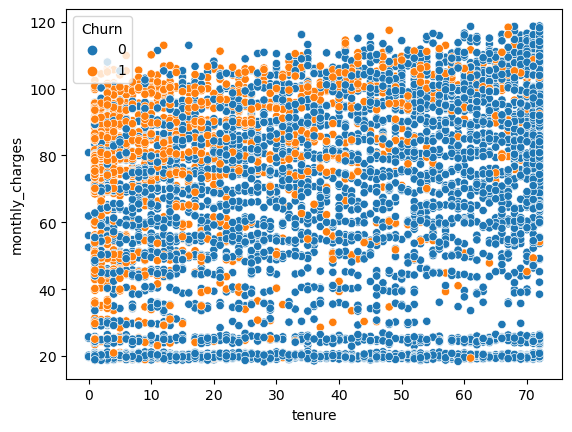

In [52]:
sns.scatterplot(data=df_telco, x=df_telco['tenure'], y=df_telco['monthly_charges'],
               hue=df_telco['Churn'])

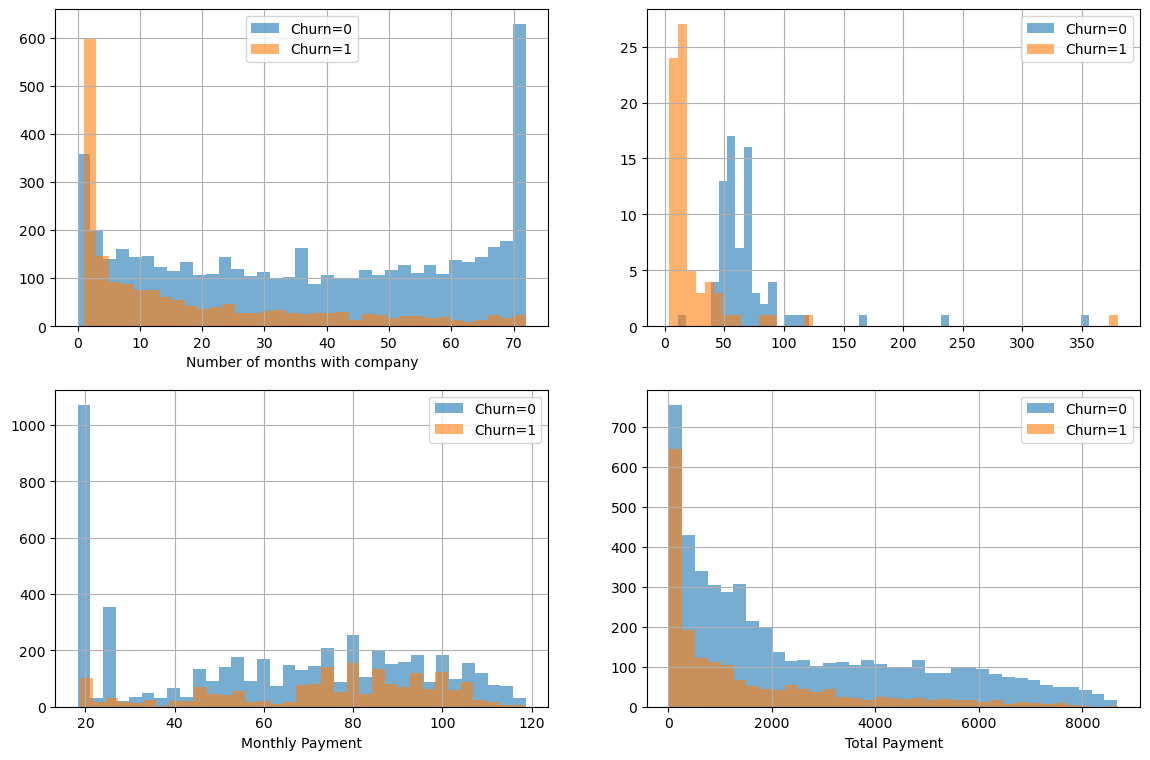

In [68]:
#graph of tenure v monthly_charges, total_charges

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 14))

plt.subplot(3, 2, 1)
df_telco[df_telco['Churn'] == 0].tenure.hist(bins=35, alpha=0.6, label='Churn=0')
df_telco[df_telco['Churn'] == 1].tenure.hist(bins=35, alpha=0.6, label='Churn=1')
plt.legend()
plt.xlabel('Number of months with company')

plt.subplot(3, 2, 2)
df_telco[df_telco['Churn'] == 0].tenure.value_counts().hist(bins=50, alpha=0.6, label='Churn=0')
df_telco[df_telco['Churn'] == 1].tenure.value_counts().hist(bins=50, alpha=0.6, label='Churn=1')
plt.legend()

plt.subplot(3, 2, 3)
df_telco[df_telco['Churn'] == 0].monthly_charges.hist(bins=35, alpha=0.6, label='Churn=0')
df_telco[df_telco['Churn'] == 1].monthly_charges.hist(bins=35, alpha=0.6, label='Churn=1')
plt.xlabel('Monthly Payment')
plt.legend()

plt.subplot(3, 2, 4)
df_telco[df_telco['Churn'] == 0].Total_Charges.hist(bins=35, alpha=0.6, label='Churn=0')
df_telco[df_telco['Churn'] == 1].Total_Charges.hist(bins=35, alpha=0.6, label='Churn=1')
plt.xlabel('Total Payment')
plt.legend()

plt.show()


In [82]:
#Comparing churn to device protection and security

pd.crosstab(df_telco['Churn'], [df_telco['online_security'], df_telco['online_backup'],
                               df_telco['device_protection']])

online_security     No                No internet service  Yes               
online_backup       No       Yes      No internet service   No       Yes     
device_protection   No  Yes   No  Yes No internet service   No  Yes   No  Yes
Churn                                                                        
0                  716  422  442  457                1413  357  360  369  638
1                  793  264  236  168                 113  118   58   64   55

#### The ANOVA F value can tell you if there is a significant difference between the levels of the independent variable, when p < . 05. So, a higher F value indicates that the treatment variables are significant. Note that the ANOVA alone does not tell us specifically which means were different from one another.

In [87]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Create a formula for the ANOVA model
formula = 'Churn ~ online_security + online_backup + device_protection'

# Fit the ANOVA model
model = ols(formula, data=data_telco).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)


#Conclusion based on statisitcs: 
 
if p < alpha: 
    print('There is a relationship between online/sceurity services and churn') 
else: 
    print('We fail to reject the null hypothesis')

                        sum_sq      df         F    PR(>F)
online_security       0.498044     2.0  1.501469  0.220487
online_backup         0.498044     2.0  1.501469  0.220487
device_protection     0.498044     2.0  1.501469  0.220487
Residual           1167.101293  7037.0       NaN       NaN
There is a fiscal association between online/sceurity services and churn


/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


<Axes: xlabel='online_security-online_backup-device_protection', ylabel='Churn'>

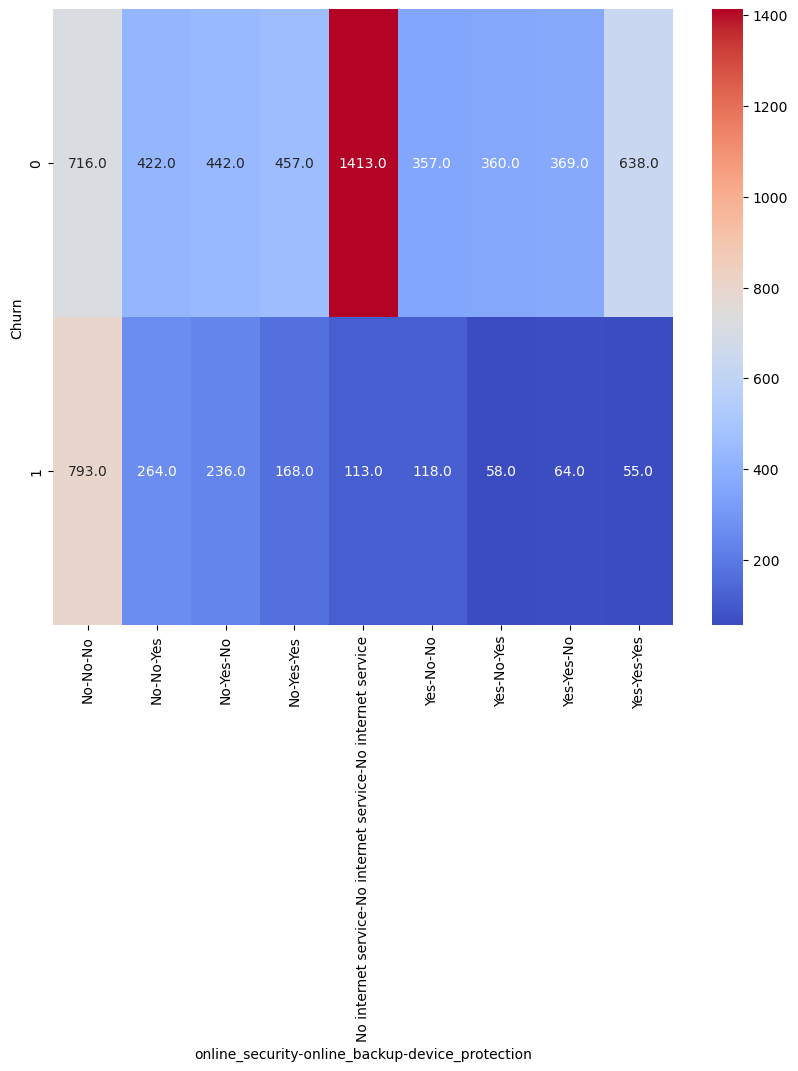

In [118]:
telco_margins = pd.crosstab(df_telco['Churn'], [df_telco['online_security'], df_telco['online_backup'],
                               df_telco['device_protection']])

plt.figure(figsize=(10,8))
sns.heatmap(telco_margins, cmap='coolwarm', annot=True,fmt=".1f")
#ax = sns.boxplot(telco_margins)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

#### Eliminating and Replacing Missing Values

In [191]:
#Checking for any null values still left within 'Total_Charges' column
df_telco.Total_Charges.isna().sum()

11

In [192]:
#Checking null values against entire dataframe
df_telco.isna().sum()

gender                    0
senior_citizen            0
partner                   0
dependents                0
tenure                    0
phone_service             0
multiple_lines            0
online_security           0
online_backup             0
device_protection         0
tech_support              0
streaming_tv              0
streaming_movies          0
paperless_billing         0
monthly_charges           0
internet_service_type     0
contract_type             0
payment_type              0
Churn                     0
baseline_prediction       0
Total_Charges            11
dtype: int64

In [193]:
#Fill 'Total_charges' with median value
#data['Total_Charges'] = data.Total_Charges.fillna(value=data.TotalCharges.median())

#Drop 'Total_charges' null values
df_telco.dropna(subset=['Total_Charges'], inplace=True)


In [194]:
df_telco.isna().sum()

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
internet_service_type    0
contract_type            0
payment_type             0
Churn                    0
baseline_prediction      0
Total_Charges            0
dtype: int64

#### Encoding of the Data for Modeling

In [195]:
#Encoding the object then incorporating back into the original dataframe

#Importing the models
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

In [196]:
#Obtaining object-type columns

df_telco.select_dtypes(include='O').columns


Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing',
       'internet_service_type', 'contract_type', 'payment_type'],
      dtype='object')

In [ ]:
#Alt method: pd.get_dummies(df_telco)

In [197]:
#Encode and make Dataframe"

#df_telco.select_dtypes(include='O').columns


#Transform objects and strings into categorey
for label, content in df_telco.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_telco[label] = pd.Categorical(content)
        
#df_telco.dtypes 
#df_telco.select_dtypes(include='category').columns

# Encoding data using OneHotEncoder
labels = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing',
       'internet_service_type', 'contract_type', 'payment_type']  
categorical_data = df_telco[labels]  
ohe = OneHotEncoder(categories='auto')  
feature_arr = ohe .fit_transform(categorical_data).toarray()  
ohe_labels = ohe.get_feature_names_out(labels)  
features = pd.DataFrame(feature_arr,columns=ohe_labels)

In [199]:
#Join encoded data to original dataframe

enc_df_telco = df_telco.join(features)
enc_df_telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,internet_service_type,contract_type,payment_type,Churn,baseline_prediction,Total_Charges,gender_Female,gender_Male,partner_No,partner_Yes,...,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,DSL,One year,Mailed check,0,0,593.30,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,DSL,Month-to-month,Mailed check,0,0,542.40,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,Fiber optic,Month-to-month,Electronic check,1,0,280.85,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,Fiber optic,Month-to-month,Electronic check,1,0,1237.85,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,Fiber optic,Month-to-month,Mailed check,1,0,267.40,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [200]:
enc_df_telco = enc_df_telco.drop(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing',
       'internet_service_type', 'contract_type', 'payment_type'], axis=1)

In [201]:
enc_df_telco.head()

,senior_citizen,tenure,monthly_charges,Churn,baseline_prediction,Total_Charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.6,0,0,593.30,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,9,59.9,0,0,542.40,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,4,73.9,1,0,280.85,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,13,98.0,1,0,1237.85,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,3,83.9,1,0,267.40,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Splitting Data, Fitting Data, and Creating DataFrames from results for Further Modeling/Analysis

In [202]:
#Split the data into train, validate, and test sets using function from prepare import

def train_test_validate2(df, test_size=(0.2, 0.5), random_state=123):
    train, test = train_test_split(df, test_size=test_size[0], random_state=random_state)
    train_validate, test_validate = train_test_split(train, test_size=test_size[1], random_state=random_state)
    
    return train, test, train_validate, test_validate

In [203]:
#Inputting the newly joined table into the function for splitting
train, test, train_validate, test_validate = train_test_validate2(enc_df_telco)

In [204]:
#Testing the shape of the train and test date
train.shape, test.shape

((5625, 47), (1407, 47))

In [248]:
#Displaying the test data for review of errors
test.head()

,senior_citizen,tenure,monthly_charges,Churn,baseline_prediction,Total_Charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6830,0,51,69.15,0,0,3649.60,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
364,1,57,71.10,0,0,4140.10,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2066,0,57,94.70,0,0,5468.95,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6964,0,25,54.10,0,0,1373.00,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4870,0,11,20.10,1,0,221.35,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [205]:
#Fitting the data to X[dependent features], and y[Independent feature]
X_train = train.drop(['Churn'], axis=1)

X_test = test.drop(['Churn'], axis=1)

y_train = train['Churn']

y_test = test['Churn']

In [206]:
#Checking the shape of X, y train and test for review of symmetry
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5625, 46), (5625,), (1407, 46), (1407,))

In [207]:
# Convert y to binary if it's not already. This is neccessary for model fitting purpose later on
y_train_binary = (y_train > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)


In [208]:
#Scaling Data

scaler = StandardScaler()

scale_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.fit_transform(X_test)

In [209]:
# Create a DataFrame from the scaled data with appropriate column labels
X_train_scaled_df = pd.DataFrame(scale_X_train, columns=X_train.columns)

# Display the DataFrame
#print(X_scaled_df)
X_train_scaled_df


,senior_citizen,tenure,monthly_charges,baseline_prediction,Total_Charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,-0.437301,-0.704730,0.132603,0.0,-0.513815,1.009124,-1.009124,0.966543,-0.966543,0.655070,-0.655070,3.097473,-3.097473,-0.961043,3.097473,-0.860550,0.996622,-0.521345,-0.630721,-0.888778,-0.521345,1.377974,-0.888778,-0.521345,1.377974,1.000891,-0.521345,-0.634033,-0.815285,-0.521345,1.258565,-0.808944,-0.521345,1.248700,-0.824091,0.824091,1.385611,-0.893281,-0.521345,0.899420,-0.514431,-0.558769,-0.537062,-0.525211,1.406691,-0.537612
1,-0.437301,1.579658,0.516985,0.0,1.473572,1.009124,-1.009124,0.966543,-0.966543,0.655070,-0.655070,-0.322844,0.322844,1.040536,-0.322844,-0.860550,0.996622,-0.521345,-0.630721,1.125140,-0.521345,-0.725703,1.125140,-0.521345,-0.725703,1.000891,-0.521345,-0.634033,1.226564,-0.521345,-0.794556,1.236180,-0.521345,-0.800833,-0.824091,0.824091,-0.721703,1.119469,-0.521345,0.899420,-0.514431,-0.558769,-0.537062,-0.525211,1.406691,-0.537612
2,-0.437301,-0.011255,-0.108054,0.0,-0.178181,1.009124,-1.009124,0.966543,-0.966543,0.655070,-0.655070,3.097473,-3.097473,-0.961043,3.097473,-0.860550,0.996622,-0.521345,-0.630721,-0.888778,-0.521345,1.377974,1.125140,-0.521345,-0.725703,1.000891,-0.521345,-0.634033,-0.815285,-0.521345,1.258565,-0.808944,-0.521345,1.248700,-0.824091,0.824091,1.385611,-0.893281,-0.521345,0.899420,-0.514431,-0.558769,-0.537062,-0.525211,1.406691,-0.537612
3,-0.437301,-0.541560,-1.491829,0.0,-0.838350,-0.990958,0.990958,0.966543,-0.966543,0.655070,-0.655070,-0.322844,0.322844,1.040536,-0.322844,-0.860550,-1.003390,-0.521345,1.585486,1.125140,-0.521345,-0.725703,-0.888778,-0.521345,1.377974,1.000891,-0.521345,-0.634033,1.226564,-0.521345,-0.794556,1.236180,-0.521345,-0.800833,1.213457,-1.213457,-0.721703,1.119469,-0.521345,0.899420,-0.514431,-0.558769,1.861984,-0.525211,-0.710888,-0.537612
4,-0.437301,1.579658,1.406077,0.0,2.271248,1.009124,-1.009124,-1.034615,1.034615,0.655070,-0.655070,-0.322844,0.322844,1.040536,-0.322844,-0.860550,0.996622,-0.521345,-0.630721,-0.888778,-0.521345,1.377974,-0.888778,-0.521345,1.377974,-0.999110,-0.521345,1.577206,-0.815285,-0.521345,1.258565,1.236180,-0.521345,-0.800833,-0.824091,0.824091,-0.721703,1.119469,-0.521345,-1.111828,1.943894,-0.558769,-0.537062,-0.525211,1.406691,-0.537612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,-0.437301,-1.275827,-0.631148,0.0,-0.985646,-0.990958,0.990958,-1.034615,1.034615,0.655070,-0.655070,-0.322844,0.322844,1.040536,-0.322844,-0.860550,0.996622,-0.521345,-0.630721,1.125140,-0.521345,-0.725703,1.125140,-0.521345,-0.725703,1.000891,-0.521345,-0.634033,1.226564,-0.521345,-0.794556,1.236180,-0.521345,-0.800833,-0.824091,0.824091,-0.721703,1.119469,-0.521345,0.899420,-0.514431,-0.558769,-0.537062,-0.525211,1.406691,-0.537612
5621,-0.437301,1.579658,-1.306323,0.0,-0.163332,1.009124,-1.009124,0.966543,-0.966543,0.655070,-0.655070,-0.322844,0.322844,1.040536,-0.322844,

In [210]:
#Filling/Replacing Nan values with 0, so that the data fitted to the model

X_train_scaled_df = X_train_scaled_df.fillna(0)
#X_train_scaled_df

In [211]:
# Create a DataFrame from the scaled data with appropriate column labels
X_test_scaled_df = pd.DataFrame(scale_X_test, columns=X_test.columns)

# Display the DataFrame
#print(X_scaled_df)
X_test_scaled_df


,senior_citizen,tenure,monthly_charges,baseline_prediction,Total_Charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,-0.452353,0.729973,0.120098,0.0,0.559037,-0.988684,0.988684,-1.039174,1.039174,-1.550599,1.550599,-0.344291,0.344291,-0.976103,-0.344291,1.209275,-0.962303,-0.538431,1.547945,1.148970,-0.538431,-0.724531,1.139028,-0.538431,-0.717695,1.057104,-0.538431,-0.659313,-0.818434,-0.538431,1.293446,-0.808775,-0.538431,1.277873,-0.851559,0.851559,-0.731392,1.159023,-0.538431,-1.092450,-0.514187,1.746961,-0.498666,-0.527429,1.395560,-0.568042
1,2.210663,0.973364,0.183557,0.0,0.770417,-0.988684,0.988684,-1.039174,1.039174,0.644912,-0.644912,-0.344291,0.344291,-0.976103,-0.344291,1.209275,1.039174,-0.538431,-0.646018,-0.870345,-0.538431,1.380202,-0.877941,-0.538431,1.393349,1.057104,-0.538431,-0.659313,-0.818434,-0.538431,1.293446,1.236437,-0.538431,-0.782551,-0.851559,0.851559,1.367256,-0.862796,-0.538431,-1.092450,1.944817,-0.572423,-0.498666,1.895988,-0.716558,-0.568042
2,-0.452353,0.973364,0.951577,0.0,1.343082,1.011445,-1.011445,-1.039174,1.039174,-1.550599,1.550599,-0.344291,0.344291,-0.976103,-0.344291,1.209275,-0.962303,-0.538431,1.547945,1.148970,-0.538431,-0.724531,-0.877941,-0.538431,1.393349,1.057104,-0.538431,-0.659313,-0.818434,-0.538431,1.293446,1.236437,-0.538431,-0.782551,1.174316,-1.174316,-0.731392,1.159023,-0.538431,0.915373,-0.514187,-0.572423,-0.498666,-0.527429,1.395560,-0.568042
3,-0.452353,-0.324724,-0.369678,0.0,-0.422059,1.011445,-1.011445,-1.039174,1.039174,-1.550599,1.550599,-0.344291,0.344291,1.024482,-0.344291,-0.826942,1.039174,-0.538431,-0.646018,1.148970,-0.538431,-0.724531,1.139028,-0.538431,-0.717695,1.057104,-0.538431,-0.659313,1.221846,-0.538431,-0.773128,-0.808775,-0.538431,1.277873,-0.851559,0.851559,-0.731392,1.159023,-0.538431,0.915373,-0.514187,-0.572423,-0.498666,-0.527429,1.395560,-0.568042
4,-0.452353,-0.892637,-1.476147,0.0,-0.918360,-0.988684,0.988684,0.962303,-0.962303,0.644912,-0.644912,-0.344291,0.344291,1.024482,-0.344291,-0.826942,1.039174,-0.538431,-0.646018,-0.870345,-0.538431,1.380202,1.139028,-0.538431,-0.717695,1.057104,-0.538431,-0.659313,-0.818434,-0.538431,1.293446,-0.808775,-0.538431,1.277873,-0.851559,0.851559,-0.731392,1.159023,-0.538431,-1.092450,1.944817,-0.572423,2.005350,-0.527429,-0.716558,-0.568042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,-0.452353,1.581843,-0.366423,0.0,0.683085,1.011445,-1.011445,-1.039174,1.039174,0.644912,-0.644912,-0.344291,0.344291,-0.976103,-0.344291,1.209275,1.039174,-0.538431,-0.646018,-0.870345,-0.538431,1.380202,1.139028,-0.538431,-0.717695,-0.945980,-0.538431,1.516730,-0.818434,-0.538431,1.293446,-0.808775,-0.538431,1.277873,1.174316,-1.174316,-0.731392,1.159023,-0.538431,-1.092450,-0.514187,1.746961,-0.498666,1.895988,-0.716558,-0.568042
1403,-0.452353,-1.298290,-1.466384,0.0,-1.004959,-0.988684,0.988684,-1.039174,1.039174,0.644912,-0.644912,-0.344291,0.344291,-0.976103,-0.344291,1.2

In [212]:
X_test_scaled_df = X_test_scaled_df.fillna(0)
#X_test_scaled_df

#### Model Fitting and Mertrics Scoring

In [213]:
#Importing the model for fitting

svc = SVC(probability=True, random_state=123)

In [214]:
# Use 'y_train_binary' and 'y_test_binary' in your model
svc.fit(X_train_scaled_df, y_train_binary)



SVC(probability=True, random_state=123)

In [215]:
score = svc.score(X_test_scaled_df, y_test_binary)
print("Accuracy:", score)

Accuracy: 0.7739872068230277


In [216]:
#Calculating y_pred for later use in sklearn.metrics models
y_pred = svc.predict(X_test_scaled_df)

In [217]:
#Calculating y_proba for later use to obtain ROC_AUC score to score model identification and prediction capabilites
y_proba = svc.predict_proba(X_test_scaled_df)

In [218]:
#Classification Report

print(classification_report(y_test_binary, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1037
           1       0.62      0.36      0.46       370

    accuracy                           0.77      1407
   macro avg       0.71      0.64      0.66      1407
weighted avg       0.75      0.77      0.75      1407



In [219]:
round(accuracy_score(y_test_binary, y_pred),3)

0.774

In [220]:
#Importing cross_validation method to to evaluate machine learning models, 
#by training a number of models on different subsets of the input data. 

from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=False)

score = cross_val_score(svc,X_train_scaled_df, y_train_binary, cv=kf)
round(score.mean(),3)

0.776

No Model: ROC AUC=0.500
SVC: ROC AUC=0.754


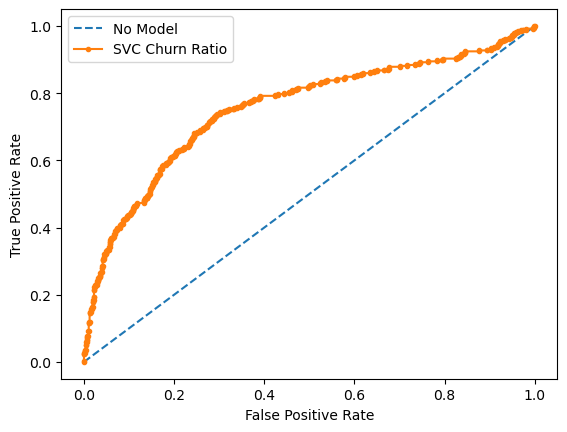

In [92]:
#Plotting ROC_AUC Score and Curve

import matplotlib.pyplot as plt
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# generate a non effect prediction (majority class)
ns_probs = [0 for _ in range(len(y_test_binary))]

# keep probabilities for the positive outcome only
lr_probs = y_proba[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Model: ROC AUC=%.3f' % (ns_auc))
print('SVC: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_binary, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_binary, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Model')
plt.plot(lr_fpr, lr_tpr, marker='.', label='SVC Churn Ratio')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### Hyper-parameter Tuning

In [221]:
#Hyper-parameter Tuning

param_grid = {
    'C':[0.1,1, 10, 100, .001, .0001],
    'gamma':[1, 0.1, 0.01, 0.001, 0.050],
    'kernel':['rbf', 'sigmoid']
}

grid_cv = GridSearchCV(SVC(), param_grid, verbose=1, cv=5, n_jobs=-1)
grid_cv.fit(X_train_scaled_df, y_train_binary)

best_params = grid_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}


In [222]:
svc_grid = SVC(**best_params)
svc_grid.fit(X_train_scaled_df, y_train_binary)
svc_grid.score(X_test_scaled_df, y_test_binary)

0.7718550106609808

In [226]:
svc3 = svc3 = SVC(C=110, gamma=0.001, kernel='rbf')
svc3.fit(X_train_scaled_df, y_train_binary)
svc3.score(X_test_scaled_df, y_test_binary)

0.775408670931059

In [227]:
svc4 = svc3 = SVC(C=150, gamma=0.001, kernel='rbf')
svc4.fit(X_train_scaled_df, y_train_binary)
svc4.score(X_test_scaled_df, y_test_binary)

0.7782515991471215

In [231]:
svc5 = svc3 = SVC(C=150, gamma=0.002, kernel='rbf')
svc5.fit(X_train_scaled_df, y_train_binary)
round(svc5.score(X_test_scaled_df, y_test_binary),3)

0.781

### The best model appears to be svc5, which yielded a result 0.007 higher than the original model. Results also show svc5 results being .005 higher than the combined cross_val_score. The model also outscored the baseline by a score of over 4.5.

In [234]:
#Displaying dataframe and checking for edits before concatanation
X_test_scaled_df

,senior_citizen,tenure,monthly_charges,baseline_prediction,Total_Charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,-0.452353,0.729973,0.120098,0.0,0.559037,-0.988684,0.988684,-1.039174,1.039174,-1.550599,1.550599,-0.344291,0.344291,-0.976103,-0.344291,1.209275,-0.962303,-0.538431,1.547945,1.148970,-0.538431,-0.724531,1.139028,-0.538431,-0.717695,1.057104,-0.538431,-0.659313,-0.818434,-0.538431,1.293446,-0.808775,-0.538431,1.277873,-0.851559,0.851559,-0.731392,1.159023,-0.538431,-1.092450,-0.514187,1.746961,-0.498666,-0.527429,1.395560,-0.568042
1,2.210663,0.973364,0.183557,0.0,0.770417,-0.988684,0.988684,-1.039174,1.039174,0.644912,-0.644912,-0.344291,0.344291,-0.976103,-0.344291,1.209275,1.039174,-0.538431,-0.646018,-0.870345,-0.538431,1.380202,-0.877941,-0.538431,1.393349,1.057104,-0.538431,-0.659313,-0.818434,-0.538431,1.293446,1.236437,-0.538431,-0.782551,-0.851559,0.851559,1.367256,-0.862796,-0.538431,-1.092450,1.944817,-0.572423,-0.498666,1.895988,-0.716558,-0.568042
2,-0.452353,0.973364,0.951577,0.0,1.343082,1.011445,-1.011445,-1.039174,1.039174,-1.550599,1.550599,-0.344291,0.344291,-0.976103,-0.344291,1.209275,-0.962303,-0.538431,1.547945,1.148970,-0.538431,-0.724531,-0.877941,-0.538431,1.393349,1.057104,-0.538431,-0.659313,-0.818434,-0.538431,1.293446,1.236437,-0.538431,-0.782551,1.174316,-1.174316,-0.731392,1.159023,-0.538431,0.915373,-0.514187,-0.572423,-0.498666,-0.527429,1.395560,-0.568042
3,-0.452353,-0.324724,-0.369678,0.0,-0.422059,1.011445,-1.011445,-1.039174,1.039174,-1.550599,1.550599,-0.344291,0.344291,1.024482,-0.344291,-0.826942,1.039174,-0.538431,-0.646018,1.148970,-0.538431,-0.724531,1.139028,-0.538431,-0.717695,1.057104,-0.538431,-0.659313,1.221846,-0.538431,-0.773128,-0.808775,-0.538431,1.277873,-0.851559,0.851559,-0.731392,1.159023,-0.538431,0.915373,-0.514187,-0.572423,-0.498666,-0.527429,1.395560,-0.568042
4,-0.452353,-0.892637,-1.476147,0.0,-0.918360,-0.988684,0.988684,0.962303,-0.962303,0.644912,-0.644912,-0.344291,0.344291,1.024482,-0.344291,-0.826942,1.039174,-0.538431,-0.646018,-0.870345,-0.538431,1.380202,1.139028,-0.538431,-0.717695,1.057104,-0.538431,-0.659313,-0.818434,-0.538431,1.293446,-0.808775,-0.538431,1.277873,-0.851559,0.851559,-0.731392,1.159023,-0.538431,-1.092450,1.944817,-0.572423,2.005350,-0.527429,-0.716558,-0.568042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,-0.452353,1.581843,-0.366423,0.0,0.683085,1.011445,-1.011445,-1.039174,1.039174,0.644912,-0.644912,-0.344291,0.344291,-0.976103,-0.344291,1.209275,1.039174,-0.538431,-0.646018,-0.870345,-0.538431,1.380202,1.139028,-0.538431,-0.717695,-0.945980,-0.538431,1.516730,-0.818434,-0.538431,1.293446,-0.808775,-0.538431,1.277873,1.174316,-1.174316,-0.731392,1.159023,-0.538431,-1.092450,-0.514187,1.746961,-0.498666,1.895988,-0.716558,-0.568042
1403,-0.452353,-1.298290,-1.466384,0.0,-1.004959,-0.988684,0.988684,-1.039174,1.039174,0.644912,-0.644912,-0.344291,0.344291,-0.976103,-0.344291,1.2

In [253]:
#Resetting index so that concat of columns can occurr

y_test = y_test.reset_index(drop=True)
#y_test

In [254]:
# Create DataFrames for X_test, y_true, and y_pred
X_test_df = pd.DataFrame(X_test_scaled_df, columns=X_test_scaled_df.columns)  # Assuming X has column names
y_true_df = pd.DataFrame({'y_true': y_test})
y_pred_df = pd.DataFrame({'y_pred': y_pred})

# Concatenate the DataFrames horizontally
result_df2 = pd.concat([X_test_df, y_true_df, y_pred_df], axis=1)

# Display the result DataFrame
result_df2

,senior_citizen,tenure,monthly_charges,baseline_prediction,Total_Charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,y_true,y_pred
0,-0.452353,0.729973,0.120098,0.0,0.559037,-0.988684,0.988684,-1.039174,1.039174,-1.550599,1.550599,-0.344291,0.344291,-0.976103,-0.344291,1.209275,-0.962303,-0.538431,1.547945,1.148970,-0.538431,-0.724531,1.139028,-0.538431,-0.717695,1.057104,-0.538431,-0.659313,-0.818434,-0.538431,1.293446,-0.808775,-0.538431,1.277873,-0.851559,0.851559,-0.731392,1.159023,-0.538431,-1.092450,-0.514187,1.746961,-0.498666,-0.527429,1.395560,-0.568042,0,0
1,2.210663,0.973364,0.183557,0.0,0.770417,-0.988684,0.988684,-1.039174,1.039174,0.644912,-0.644912,-0.344291,0.344291,-0.976103,-0.344291,1.209275,1.039174,-0.538431,-0.646018,-0.870345,-0.538431,1.380202,-0.877941,-0.538431,1.393349,1.057104,-0.538431,-0.659313,-0.818434,-0.538431,1.293446,1.236437,-0.538431,-0.782551,-0.851559,0.851559,1.367256,-0.862796,-0.538431,-1.092450,1.944817,-0.572423,-0.498666,1.895988,-0.716558,-0.568042,0,0
2,-0.452353,0.973364,0.951577,0.0,1.343082,1.011445,-1.011445,-1.039174,1.039174,-1.550599,1.550599,-0.344291,0.344291,-0.976103,-0.344291,1.209275,-0.962303,-0.538431,1.547945,1.148970,-0.538431,-0.724531,-0.877941,-0.538431,1.393349,1.057104,-0.538431,-0.659313,-0.818434,-0.538431,1.293446,1.236437,-0.538431,-0.782551,1.174316,-1.174316,-0.731392,1.159023,-0.538431,0.915373,-0.514187,-0.572423,-0.498666,-0.527429,1.395560,-0.568042,0,0
3,-0.452353,-0.324724,-0.369678,0.0,-0.422059,1.011445,-1.011445,-1.039174,1.039174,-1.550599,1.550599,-0.344291,0.344291,1.024482,-0.344291,-0.826942,1.039174,-0.538431,-0.646018,1.148970,-0.538431,-0.724531,1.139028,-0.538431,-0.717695,1.057104,-0.538431,-0.659313,1.221846,-0.538431,-0.773128,-0.808775,-0.538431,1.277873,-0.851559,0.851559,-0.731392,1.159023,-0.538431,0.915373,-0.514187,-0.572423,-0.498666,-0.527429,1.395560,-0.568042,0,0
4,-0.452353,-0.892637,-1.476147,0.0,-0.918360,-0.988684,0.988684,0.962303,-0.962303,0.644912,-0.644912,-0.344291,0.344291,1.024482,-0.344291,-0.826942,1.039174,-0.538431,-0.646018,-0.870345,-0.538431,1.380202,1.139028,-0.538431,-0.717695,1.057104,-0.538431,-0.659313,-0.818434,-0.538431,1.293446,-0.808775,-0.538431,1.277873,-0.851559,0.851559,-0.731392,1.159023,-0.538431,-1.092450,1.944817,-0.572423,2.005350,-0.527429,-0.716558,-0.568042,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,-0.452353,1.581843,-0.366423,0.0,0.683085,1.011445,-1.011445,-1.039174,1.039174,0.644912,-0.644912,-0.344291,0.344291,-0.976103,-0.344291,1.209275,1.039174,-0.538431,-0.646018,-0.870345,-0.538431,1.380202,1.139028,-0.538431,-0.717695,-0.945980,-0.538431,1.516730,-0.818434,-0.538431,1.293446,-0.808775,-0.538431,1.277873,1.174316,-1.174316,-0.731392,1.159023,-0.538431,-1.092450,-0.514187,1.746961,-0.498666,1.895988,-0.716558,-0.568042,1,0
1403,-0.452353,-1.298290,-1.466384,0.0,-1.004959,-0.988684,0.988684,-1.039174,1.039174,0.644912,-0.644

In [ ]:
#Saving csv
result_df2.to_csv('result_df2.csv')

#### Charts, Feature Importance, and Findings

The figure layout has changed to tight


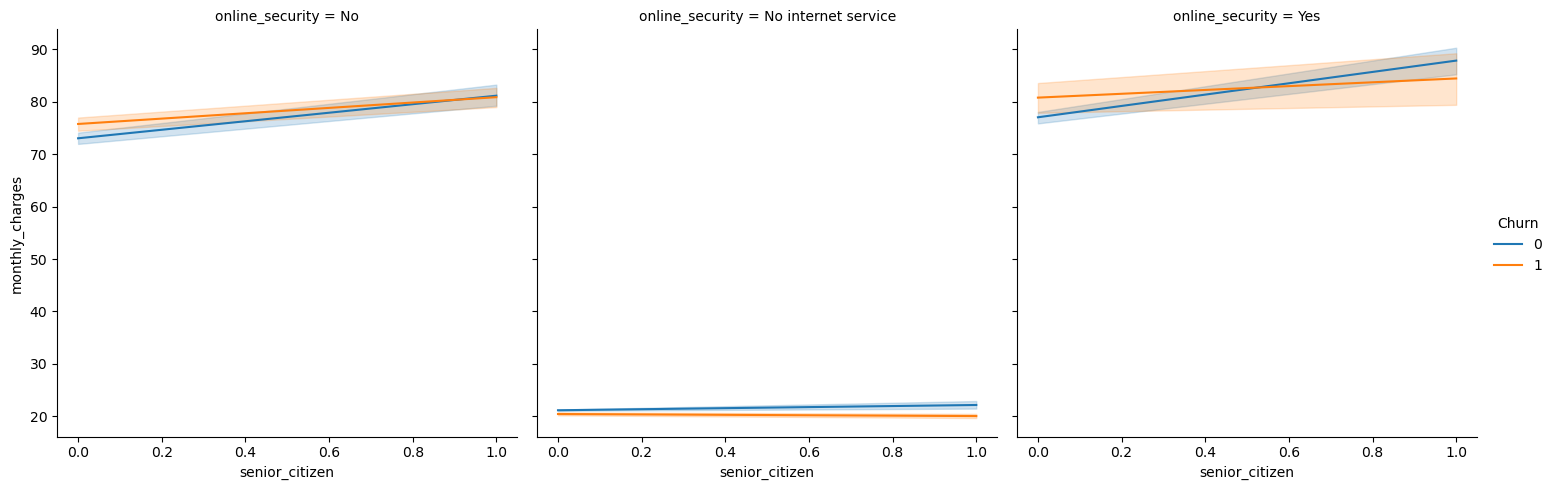

In [318]:
#Relationship lot showing 'online security' subset
sns.relplot(data=df_telco, x="senior_citizen", y="monthly_charges", 
            col="online_security",  hue="Churn", kind='line')

The figure layout has changed to tight


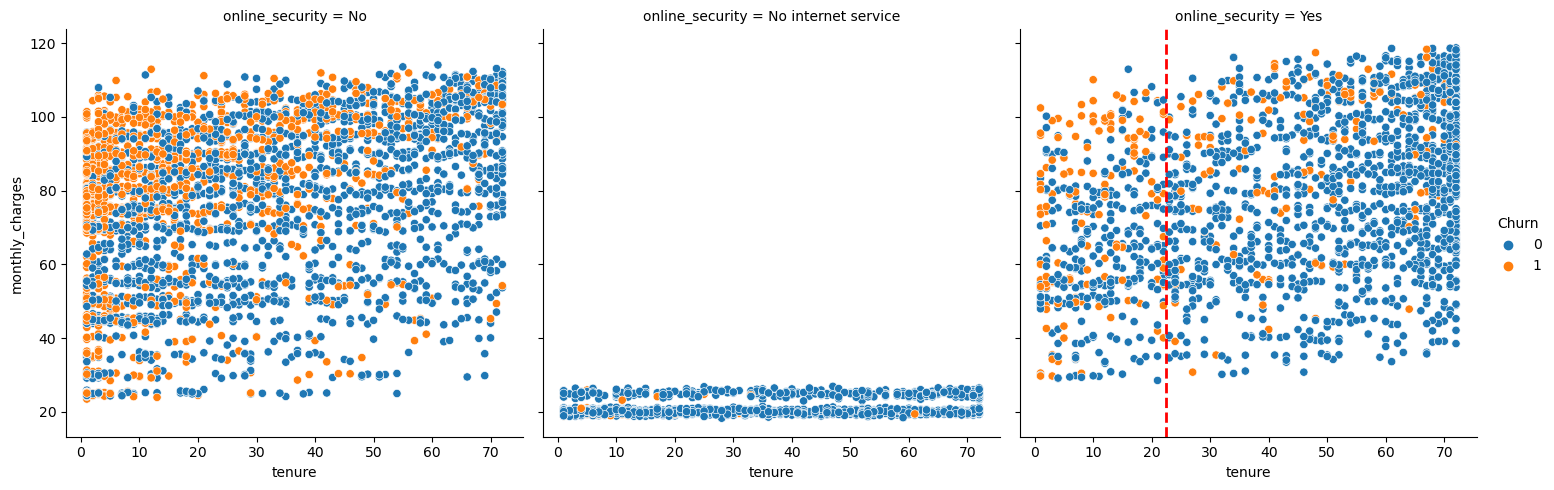

In [319]:
#Relationship lot showing 'online security' subset
sns.relplot(data=df_telco, x="tenure", y="monthly_charges", 
            col="online_security",  hue="Churn", kind='scatter')

# Add a vertical line at the 22.5 mark
plt.axvline(x=22.5, color='red', linestyle='--', linewidth=2)

**By strategically categorizing our customer data into three distinct cohorts, we gained valuable insights into the nuanced interplay of various features. The cohorts are defined as follows:

Group 1: Customers with a tenure of less than 22.5 months.
Group 2: Customers with a tenure of more than 22.5 months and committed to a contract of 2 years or more.
Group 3: Customers with a tenure of more than 22.5 months but with a contract duration of less than 2 years.

Analyzing these cohorts revealed intriguing patterns, particularly in Group 1. Customers with shorter tenure, likely representing a younger and/or single demographic, seem to prioritize features such as security, backup, tech support, and other online services over contract type and monthly charges. In today's mobile-centric landscape, the emphasis on security and functionality becomes increasingly crucial.

The second hypothesis explored the relationship between churn and tenure, and this relationship is most pronounced in Group 3. This group comprises customers with the highest tenure and the longest contract types. Notably, both tenure and contract type (2 years or more) exhibit significant influence within this cohort, indicating a strong correlation between customer loyalty, extended commitment, and overall satisfaction.

These findings provide actionable insights for our strategic planning and customer retention efforts, highlighting the importance of tailoring our services to meet the distinct preferences of different customer segments."

### Feature Importance

In [325]:
#Displaying feature importance of each feature within dataframe

pd.Series(xgb.feature_importances_, index=X_test.columns)

senior_citizen                            0.112234
tenure                                    0.317517
monthly_charges                           0.104235
baseline_prediction                       0.000000
Total_Charges                             0.018981
gender_Female                             0.025215
gender_Male                               0.000000
partner_No                                0.013934
partner_Yes                               0.000000
dependents_No                             0.012533
dependents_Yes                            0.000000
phone_service_No                          0.029630
phone_service_Yes                         0.000000
multiple_lines_No                         0.013452
multiple_lines_No phone service           0.000000
multiple_lines_Yes                        0.009300
online_security_No                        0.000000
online_security_No internet service       0.000000
online_security_Yes                       0.048900
online_backup_No               

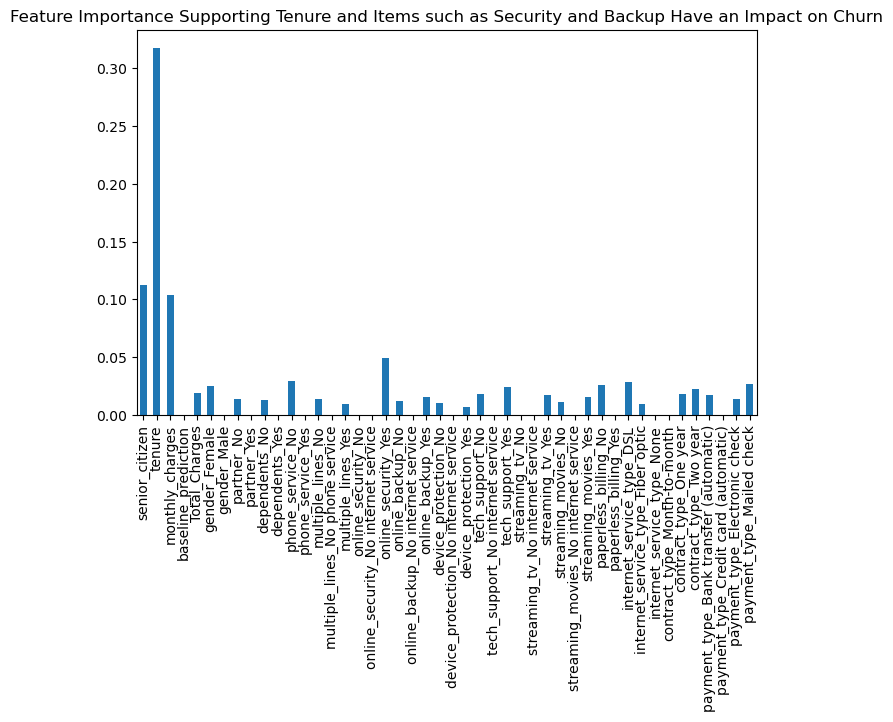

In [376]:
#Feature Importance 

plt.figure(figsize=(8,5))

pd.Series(xgb.feature_importances_, index=X_test.columns).plot(kind='bar')
plt.title("Feature Importance Supporting Tenure and Items such as Security and Backup Have an Impact on Churn");


#### Security backup practices lead to increased client satisfaction and loyalty. By providing reliable security services, a company can foster long-term relationships with their clients and reduce client churn.

In [ ]:
#Import SHAP library and develop 'Explainer' for plotting

import shap
shap.initjs()


#Get shap values and Create Tree Explainer
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

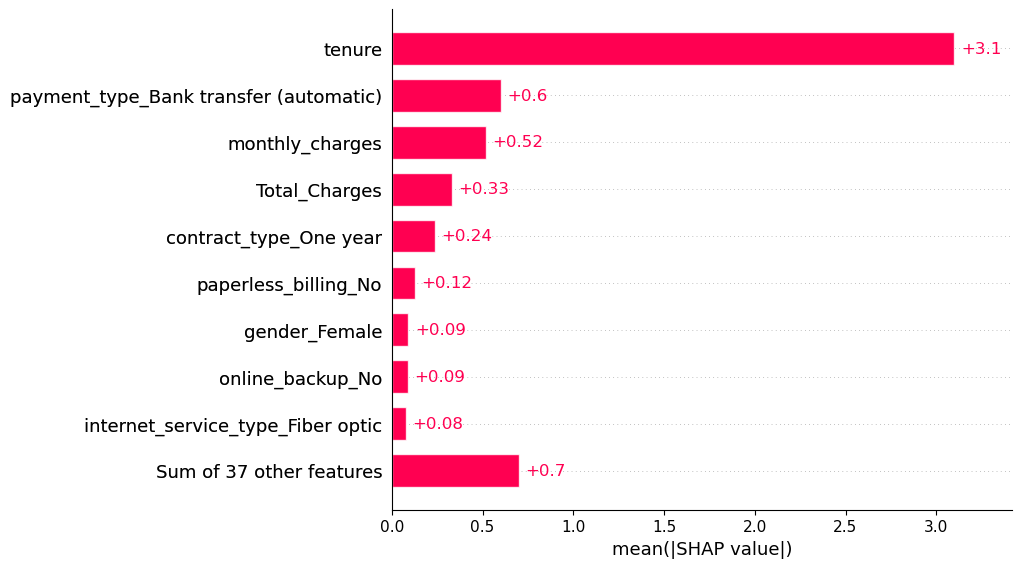

In [337]:
#This bar chart takes the global feature importance (mean absolute value for that feature over all the given samples)
#then displays the score either above or below mean accordingly.

shap.plots.bar(shap_values)


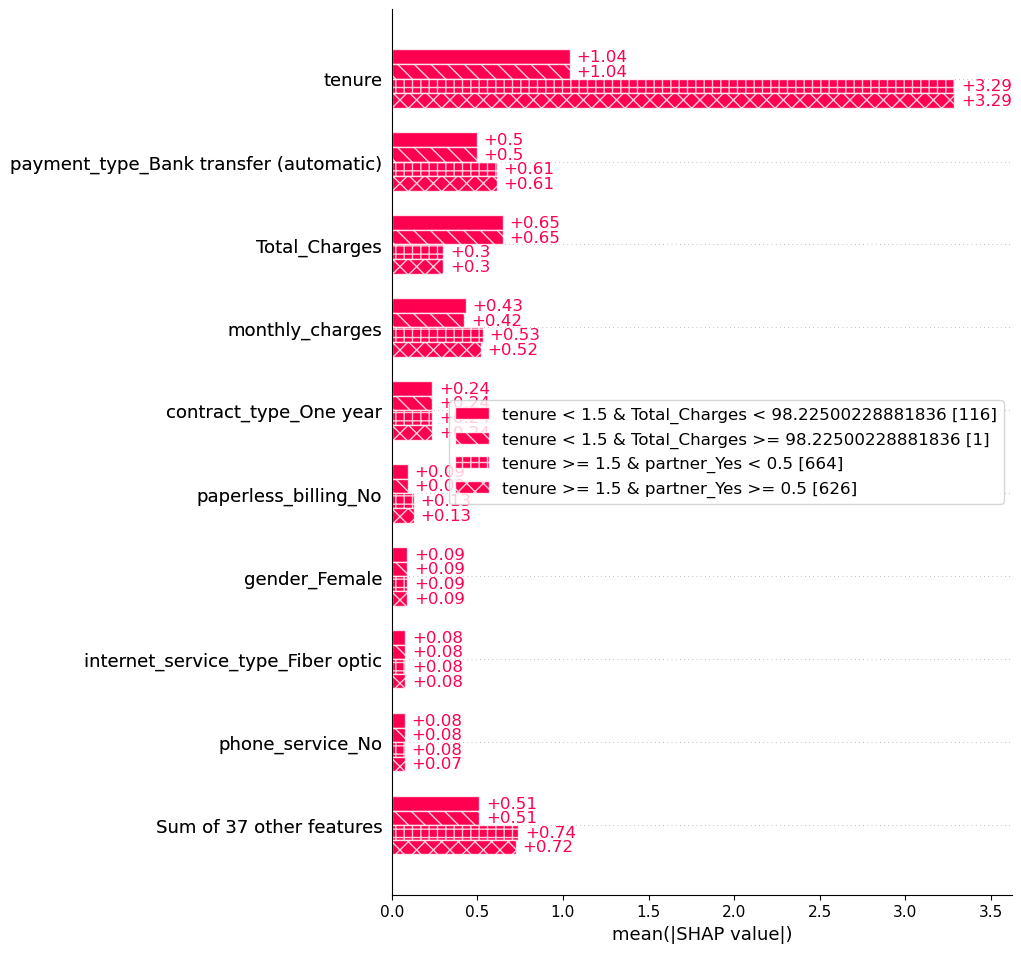

In [378]:
#plot designed to pass dict of objects that creates a multi-bar plot with one bar type
#designated to each cohort[A group sharing a specific feature]. This type of chart can be useful
#when inquiring teh performance of cohort over time.

shap.plots.bar(shap_values.cohorts(4).abs.mean(0))


### Supporting Findings

### In delving deeper into our customer dynamics, we've isolated the impact of tenure, shedding light on crucial factors such as security and backup – elements compatible with functionality and reliability. Notably, a shift in tenure distribution has unveiled a concentrated customer base, allowing other key features to come to the forefront of importance.

### In our comprehensive analysis, we've considered both individual and relational aspects. While tenure undeniably wields significant influence, we observe a trend: as values for features like "online_security_Yes," "device_protection_Yes," "tech_support_Yes," and "online_backup_Yes" rise, the dominance of monthly charges increases. This trend aligns seamlessly with our feature importance bar chart, vividly portraying the significance of a feature over time.

### What does this signify? Customers, it seems, prioritize technical support and device security when choosing a service provider. This inclination suggests that not only are consumers inclined to stay longer with a company offering these services, but they are also willing to invest more for enhanced technical support and security – a prospect that not only boosts profitability but also acts as a powerful deterrent against churn.

### Bonus Material

-Displaying Ensemble using XGBoost ensemble method to see if it returns an improved accuracy score

In [144]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=2)
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [306]:
xgb.fit(X_train_scaled_df, y_train_binary)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [307]:
round(xgb.score(X_test_scaled_df, y_test_binary),3)

0.784